In [82]:
import numpy as np
import scipy.io as sio
import h5py
import tensorflow as tf
import pickle
import os
from matplotlib import pyplot as plt
import importlib
import inspect
from copy import deepcopy
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# root directory
if os.getcwd().find('/Users/svnh2') != -1:
    root_directory = '/Users/svnh2/Desktop/projects'
elif os.getcwd().find('/home/svnh') != -1:
    root_directory = '/mindhive/nklab/u/svnh'
elif os.getcwd().find('/home/svnh') != -1:
    root_directory = '/mindhive/nklab/u/svnh'
elif os.getcwd().find('/mindhive/nklab3') != -1:
    root_directory = '/mindhive/nklab/u/svnh'
else:
    raise NameError('No root directory found')
    
# external repositories that depend on the root directory
# reload, in case they've changed
import sys
sys.path.append(root_directory)
from general_analysis import misc
from general_analysis import plot

In [18]:
import ln
import cnn
importlib.reload(ln)

<module 'ln' from '/Users/svnh2/Dropbox (MIT)/mindhive/cnn/ln.py'>

Parameters

In [102]:
time_win_sec = 0.1
sr_Hz = 100
P = {}
P['rank'] = 1
P['act'] = 'relu'

Create features

In [103]:
# features
n_feats = 20
n_stim = 300
n_tps_per_stim = 100
feat_dims = [n_stim, n_tps_per_stim, n_feats]
F = np.random.randn(feat_dims[0], feat_dims[1], feat_dims[2])

Create STRF and sample data

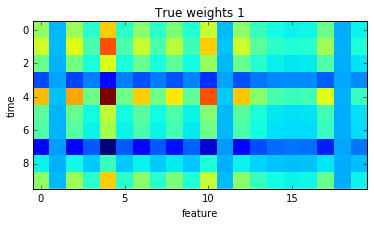

In [106]:
layers = []

# convolutional layer
layer = {}
layer['type'] = 'conv'
layer['time_win_sec'] = time_win_sec
layer['act'] = P['act']
layer['n_kern'] = 1
layer['rank'] = P['rank']
layers.append(layer)

# create network
net1_seed = 2
n_resp = 1
data_dims = [n_stim, n_tps_per_stim, n_resp]
tf.reset_default_graph()
net1 = cnn.Net(data_dims, n_feats, sr_Hz, deepcopy(layers), seed=net1_seed)
net1.build()
D = net1.predict(F)

# True STRFs
net1_layer_vals = net1.layer_vals()
plt.imshow(net1_layer_vals[0]['W'][:,:,0], interpolation='none')
plt.ylabel('time'); plt.xlabel('feature')
plt.title('True weights 1')
plt.show()

Fit LN model

Train loss: 5.11246e-07
Val loss: 5.14657e-07
Test loss: 5.08773e-07


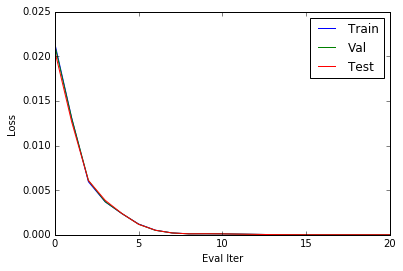

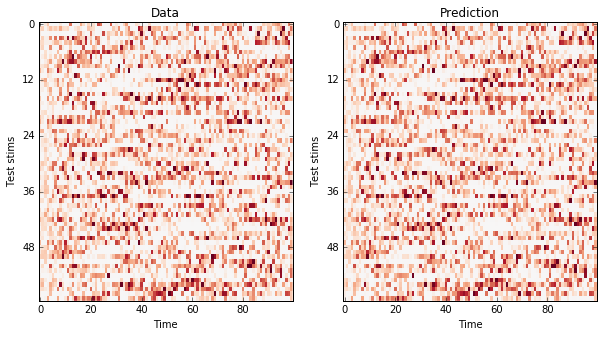

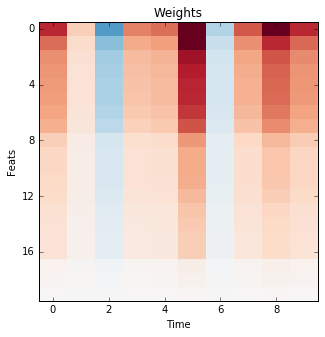

In [112]:
importlib.reload(ln)
ln_directory = misc.mkdir(os.getcwd() + '/ex-lnfit')
P['max_iter'] = 100
P['learning_rate'] = 0.01
S = ln.fit(F, D, sr_Hz, time_win_sec, O=P, overwrite=False, log_dir=ln_directory, sort_weights_PC1=True)